In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import missingno as ms
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.patches as mpatches 
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.style.use('Solarize_Light2')


In [57]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory 

# Data Preparation 

In [58]:
package_tourism = pd.read_csv("data/package_tourism.csv")

package_tourism.head(10)

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN
5,6,Jakarta,Waterboom PIK (Pantai Indah Kapuk),Jakarta Aquarium dan Safari,SnowBay Waterpark,NaN,NaN
6,7,Jakarta,Alive Museum Ancol,Ocean Ecopark,SnowBay Waterpark,NaN,NaN
7,8,Jakarta,Kota Tua,Museum Bank Indonesia,Monas,Perpustakaan Nasional,Masjid Istiqlal
8,9,Jakarta,Galeri Nasional Indonesia,Museum Seni Rupa dan Kramik,Galeri Indonesia Kaya,NaN,NaN
9,10,Jakarta,Taman Impian Jaya Ancol,Kota Tua,Museum Bank Indonesia,Museum Fatahillah,Museum Wayang


In [59]:
tourism_rating = pd.read_csv("data/tourism_rating.csv")

tourism_rating.head(10)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
5,1,312,2
6,1,258,5
7,1,20,4
8,1,154,2
9,1,393,5


In [60]:
tourism_information = pd.read_csv("data/tourism_with_id.csv")

tourism_information.head(10)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
5,6,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Taman Hiburan,Jakarta,25000,4.5,10.0,"{'lat': -6.117333200000001, 'lng': 106.8579951}",-6.117333,106.857995,NaN,6
6,7,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Cagar Alam,Jakarta,4000,4.5,NaN,"{'lat': -6.3124593, 'lng': 106.8201865}",-6.312459,106.820187,NaN,7
7,8,Ocean Ecopark,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Taman Hiburan,Jakarta,180000,4.0,NaN,"{'lat': -6.125801699999999, 'lng': 106.8363249}",-6.125802,106.836325,NaN,8
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4,NaN,"{'lat': 1.07888, 'lng': 103.931398}",1.078880,103.931398,NaN,9
9,10,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Bahari,Jakarta,150000,4.5,NaN,"{'lat': -5.803205300000001, 'lng': 106.5237907}",-5.803205,106.523791,NaN,10


In [61]:
tourism_user = pd.read_csv("data/user.csv")

tourism_user.head(10)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
5,6,"Jakarta Utara, DKI Jakarta",18
6,7,"Jakarta Selatan, DKI Jakarta",39
7,8,"Bandung, Jawa Barat",40
8,9,"Surabaya, Jawa Timur",38
9,10,"Bekasi, Jawa Barat",39


In [62]:
print(f"Number of places in the datasets : {len(tourism_information.Place_Id.unique())}")
print(f"Number of users : {len(tourism_user.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


Assesing Data

In [63]:
#Information Table Tourism 
tourism_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


- Place_Id (int64): ID unik untuk setiap destinasi wisata. Terdiri dari 437 nilai yang tidak null (non-null).
- Place_Name (object): Nama dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Description (object): Deskripsi dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Category (object): Kategori dari destinasi wisata (misalnya alam, budaya, dll.). Terdiri dari 437 nilai yang tidak null.
- City (object): Kota di mana destinasi wisata berada. Terdiri dari 437 nilai yang tidak null.
- Price (int64): Harga masuk ke destinasi wisata (jika ada). Terdiri dari 437 nilai yang tidak null.
- Rating (float64): Rating atau penilaian dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Time_Minutes (float64): Waktu yang dibutuhkan untuk mengunjungi destinasi tersebut dalam menit Terdiri dari 205 nilai yang tidak null, artinya ada banyak nilai yang hilang (missing).
- Coordinate (object): Koordinat dari destinasi wisata, biasanya dalam bentuk string. Terdiri dari 437 nilai yang tidak null.
- Lat (float64): Lintang (latitude) dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Long (float64): Bujur (longitude) dari destinasi wisata. Terdiri dari 437 nilai yang tidak null.
- Unnamed: 11 (float64): Kolom ini tidak memiliki nama dan semua nilainya adalah null (0 nilai yang tidak null).
- Unnamed: 12 (int64): Kolom ini tidak memiliki nama, tetapi memiliki 437 nilai yang tidak null. 
- Nilainya tidak diketahui dari output ini, tetapi mungkin memiliki informasi yang tidak diberi label dengan baik.

missing value

column Time_Minutes and Unnamed : 11

In [64]:
print("DataFrame Tourism Information : ")
print(tourism_information.isna().sum())

DataFrame Tourism Information : 
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


In [65]:
# Information Table tourism user
tourism_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


- Terdapat 300 entri dalam dataset ini.
- Kolom User_Id memiliki 300 nilai value.
- Kolom Location memiliki 300 nilai value.
- Kolom Age memiliki 300 nilai value.
- Data ini memiliki beberapa tipe data, termasuk objek (string) dan integer.

missing value

In [66]:
print("DataFrame Tourism User : ")
print(tourism_user.isna().sum())

DataFrame Tourism User : 
User_Id     0
Location    0
Age         0
dtype: int64


In [67]:
# information table tourism rating
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


- Terdapat 10000 entri dalam dataset ini.
- kolom User_Id memiliki 10000 nilai value.
- kolom Place_Id memiliki 10000 nilai value.
- kolom Place_Ratings 10000
- Data ini memmiliki tipe data hanya integer.

missing value

In [68]:
print("DataFrame Tourism User : ")
print(tourism_rating.isna().sum())

DataFrame Tourism User : 
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


<Axes: >

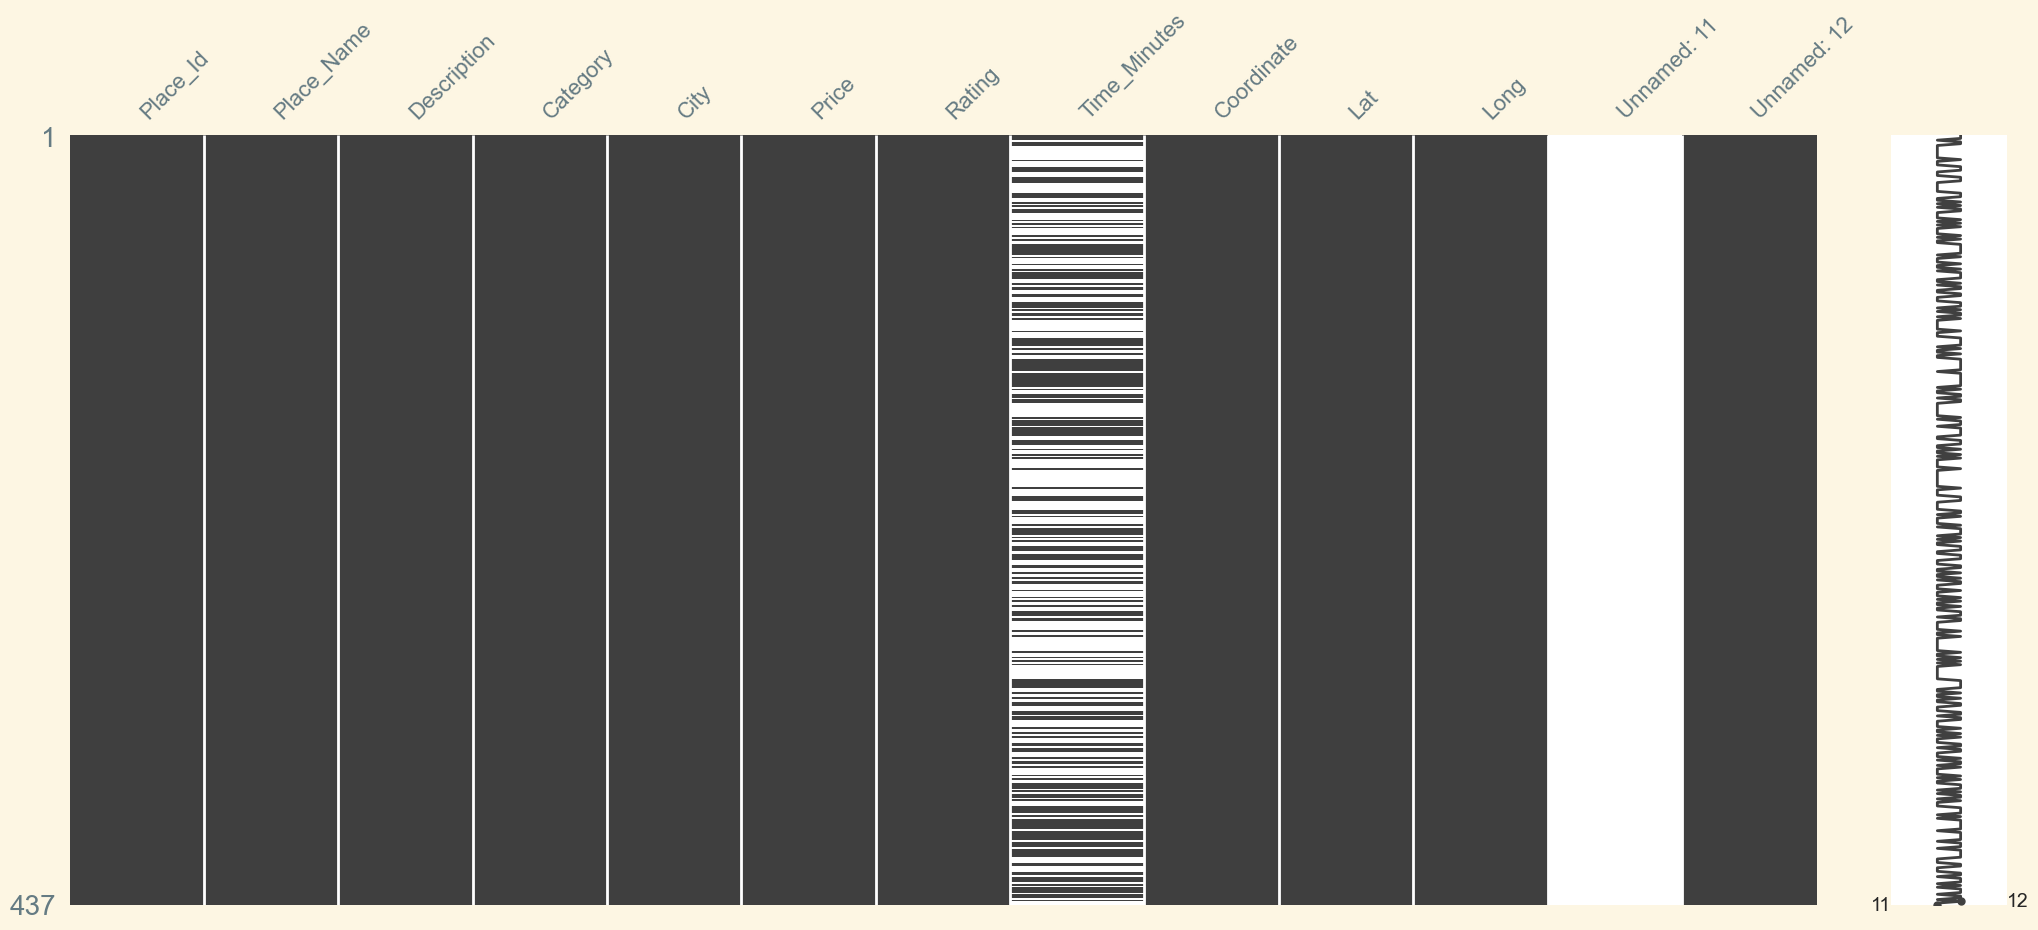

In [69]:
ms.matrix(tourism_information)

In [70]:
tourism_information.sample(10)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
38,39,Museum Macan (Modern and Contemporary Art in N...,Museum Seni Modern dan Kontemporer di Nusantar...,Budaya,Jakarta,100000,4.5,120.0,"{'lat': -6.190942, 'lng': 106.767622}",-6.190942,106.767622,NaN,39
302,303,Masjid Al-Imtizaj,Masjid Al Imtizaj adalah salah satu masjid yan...,Tempat Ibadah,Bandung,0,4.7,NaN,"{'lat': -6.919424999999999, 'lng': 107.6078639}",-6.919425,107.607864,NaN,303
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249,NaN,87
359,360,Air Terjun Kali Pancur,Kali Pancur Getasan merupakan kawasan wisata a...,Cagar Alam,Semarang,5000,4.1,NaN,"{'lat': -7.358096300000001, 'lng': 110.4210681}",-7.358096,110.421068,NaN,360
177,178,Goa Pindul,Gua Pindul adalah objek wisata berupa gua yang...,Cagar Alam,Yogyakarta,40000,4.5,NaN,"{'lat': -7.9339721, 'lng': 110.651966}",-7.933972,110.651966,NaN,178
387,388,Watu Gunung Ungaran,Objek wisata alam memang sangat cocok dikunjun...,Cagar Alam,Semarang,25000,4.4,NaN,"{'lat': -7.129806599999999, 'lng': 110.388832}",-7.129807,110.388832,NaN,388
49,50,Museum Joang 45,Gedung Joang '45 atau Museum Joang 45 adalah s...,Budaya,Jakarta,2000,4.0,NaN,"{'lat': -6.186183799999998, 'lng': 106.8364761}",-6.186184,106.836476,NaN,50
173,174,Pasar Beringharjo,"Pasar Beringharjo (bahasa Jawa: ꦥꦱꦂꦧꦼꦫꦶꦁꦲꦂꦗ, t...",Pusat Perbelanjaan,Yogyakarta,0,4.5,60.0,"{'lat': -7.798794300000001, 'lng': 110.367443}",-7.798794,110.367443,NaN,174
170,171,Candi Ijo,"Candi Ijo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦆꦗꦺꦴ, translit. ...",Budaya,Yogyakarta,5000,4.6,60.0,"{'lat': -7.783827600000001, 'lng': 110.5118987}",-7.783828,110.511899,NaN,171
14,15,Pasar Seni,Pasar Seni merupakan Pusat kerajinan dan kesen...,Pusat Perbelanjaan,Jakarta,0,4.4,90.0,"{'lat': -6.1766868, 'lng': 106.8417666}",-6.176687,106.841767,NaN,15


In [71]:
print("summary data tourism information duplicated : ", tourism_information.duplicated().sum())
print("summary data tourism rating duplicated : ", tourism_rating.duplicated().sum())
print("summary data tourism user duplicated : ", tourism_user.duplicated().sum())

summary data tourism information duplicated :  0
summary data tourism rating duplicated :  79
summary data tourism user duplicated :  0


- terdapat tourism rating duplikat berjumlah 79
- tourism rating dan user tidak ada nilai data yang duplikat

Descriptive statictics

In [72]:
tourism_information.describe().style.background_gradient(cmap="RdPu")

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.000000,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,nan,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,nan,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,nan,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,nan,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,nan,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,nan,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,nan,437.000000


(-) Descriptive Analysis of tourism information

1. Dataset tourism information

- summary data entries : 437
- Q1 and Q3 : 110 and 328
- standard deviation :  126.29
- Rata-rata Price : 24.652 Rupiah
- mean Rating : 4.44 
- mean Time Minutes : 82 minutes
- mean Latitude : -7.095438
- mean Longtitude : 109.160142

In [73]:
tourism_rating.describe().style.background_gradient(cmap="RdPu")

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


(-) Descriptive Analysis of tourism ratings

2. Dataset tourism rating

- summary data entries : 10000
- Q1 and Q3 : 77 and 226
- standard deviation : 86.13
- mean Place Id :  219
- mean Place Rating : 3.06 

In [74]:
tourism_user.describe().style.background_gradient(cmap="RdPu")

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


(-) Descriptive Analysis of tourism users

3. Dataset tourism users

- summary data entries : 300
- standard deviation : 86.74
- Q1 and Q3 : 75 and 225
- mean User Id : 150
- mean Age : 28

Cleaning Data

Imputation Data

In [75]:
tourism_information[tourism_information.Time_Minutes.isna()]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
6,7,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Cagar Alam,Jakarta,4000,4.5,NaN,"{'lat': -6.3124593, 'lng': 106.8201865}",-6.312459,106.820187,NaN,7
7,8,Ocean Ecopark,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Taman Hiburan,Jakarta,180000,4.0,NaN,"{'lat': -6.125801699999999, 'lng': 106.8363249}",-6.125802,106.836325,NaN,8
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4,NaN,"{'lat': 1.07888, 'lng': 103.931398}",1.078880,103.931398,NaN,9
9,10,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Bahari,Jakarta,150000,4.5,NaN,"{'lat': -5.803205300000001, 'lng': 106.5237907}",-5.803205,106.523791,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,427,Patung Buddha Empat Rupa,"Terletak di sudut Pantai Ria Kenjeran, Patung ...",Budaya,Surabaya,0,4.3,NaN,"{'lat': -7.2472841, 'lng': 112.8010814}",-7.247284,112.801081,NaN,427
430,431,Taman Hiburan Rakyat,Taman Hiburan Rakyat atau THR tentunya sudah t...,Taman Hiburan,Surabaya,5000,4.2,NaN,"{'lat': -7.252291, 'lng': 112.7520012}",-7.252291,112.752001,NaN,431
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [76]:
tourism_information.Time_Minutes.value_counts()

Time_Minutes
90.0     43
60.0     40
45.0     33
120.0    28
30.0     20
150.0    12
180.0     9
15.0      8
20.0      3
240.0     2
210.0     2
25.0      2
360.0     1
10.0      1
300.0     1
Name: count, dtype: int64

In [77]:
mean_time_minutes = tourism_information['Time_Minutes'].mean()
tourism_information['Time_Minutes'].fillna(mean_time_minutes, inplace=True)

print(tourism_information.isna().sum())

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes      0
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


In [78]:
tourism_information.drop(columns=["Unnamed: 11", "Unnamed: 12"], axis=1, inplace=True)

In [79]:
# Reset indeks tanpa menyimpan kolom 'index' yang baru
tourism_information.reset_index(drop=True, inplace=True)

# Periksa kembali nama kolom untuk memastikan kolom yang tidak diinginkan telah dihapus
print(tourism_information.columns)


Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'],
      dtype='object')


In [80]:
print("summary data tourism rating duplicated : ", tourism_rating.duplicated().sum())

summary data tourism rating duplicated :  79


In [81]:
if tourism_rating.duplicated().sum() > 0:
    tourism_rating.drop_duplicates(inplace=True)
    tourism_rating.reset_index(inplace=True, drop=True)

print("Jumlah Data yang duplicate", tourism_rating.duplicated().sum())

Jumlah Data yang duplicate 0


#  Exploratory Data Analysis

In [82]:
tourism_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  437 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


In [83]:
tourism_information.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [84]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        9921 non-null   int64
 1   Place_Id       9921 non-null   int64
 2   Place_Ratings  9921 non-null   int64
dtypes: int64(3)
memory usage: 232.7 KB


In [85]:
tourism_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


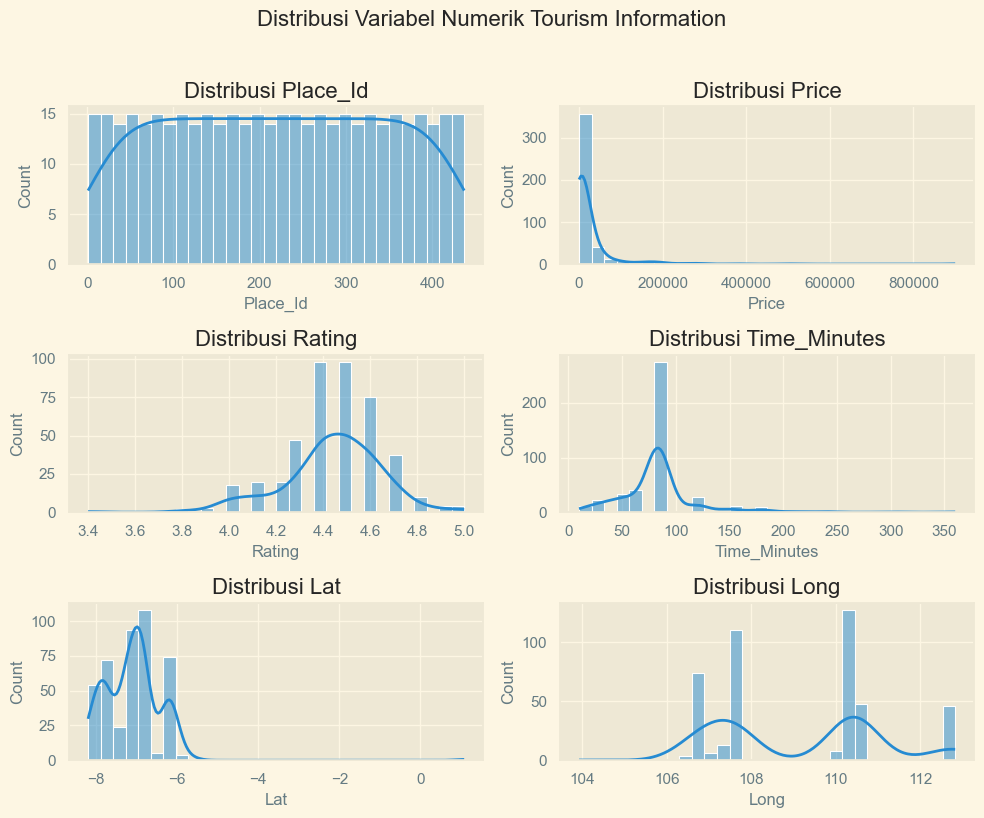

In [86]:
numeric_cols_information = ['Place_Id', 'Price', 'Rating', 'Time_Minutes', 'Lat', 'Long']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.suptitle('Distribusi Variabel Numerik Tourism Information', y=1.02, fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through numeric columns and create histograms
for i, col in enumerate(numeric_cols_information):
    sns.histplot(tourism_information[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribusi {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Data Preprocessing


In [87]:
import numpy as np

tourism_all = np.concatenate((
    tourism_information.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [88]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9916,300,425,2
9917,300,64,4
9918,300,311,3
9919,300,279,4


In [89]:
all_tourism = pd.merge(all_tourism_rate, tourism_information[["Place_Id", "Place_Name", "Description", "City", "Category"]], on="Place_Id", how="left")

In [90]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9916,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9917,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9918,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9919,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [91]:
all_tourism["city_category"] = all_tourism[["City", "Category"]].agg(' '.join, axis=1)

In [92]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9916,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9917,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9918,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9919,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


Data Preparation

Missing Values 

In [93]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [94]:
preparation=all_tourism.drop_duplicates("Place_Id")

In [95]:
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
1989,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2378,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2427,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2512,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [96]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

place_category = preparation.Category.tolist()

city_category = preparation.city_category.tolist()

In [97]:
tourism_new = pd.DataFrame(
    {
        "id":place_id,
        "name":place_name,
        "category":place_category,
        "description":place_desc,
        "city": place_city,
        "city_category": city_category
    }
)

In [98]:
tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


In [99]:
# top_10 = tourism_new['id'].value_counts().reset_index()[0:10]
# top_10 = pd.merge(top_10,preparation[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# # Membuat visualisasi wisata dengan jumlah rating terbanyak
# plt.figure(figsize=(8,5))
# sns.barplot('Place_Id', 'Place_Name', data=top_10)
# plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
# plt.ylabel('Jumlah Rating')
# plt.xlabel('Nama Lokasi')
# plt.show()

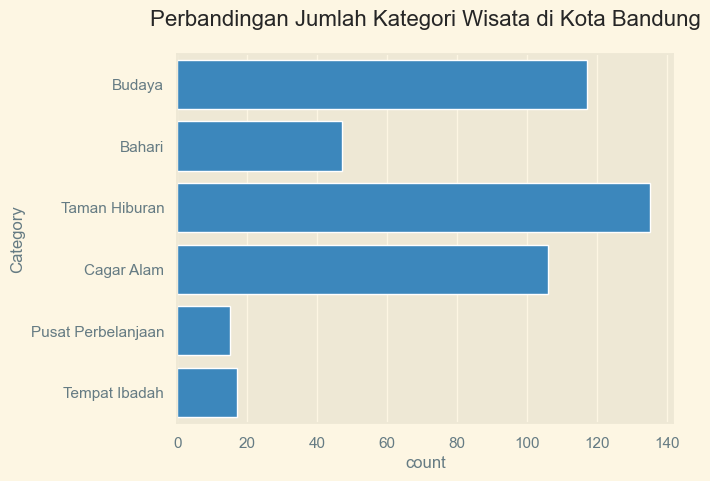

In [100]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

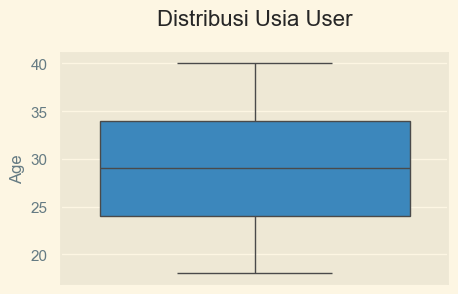

In [101]:
plt.figure(figsize=(5,3))
sns.boxplot(tourism_user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

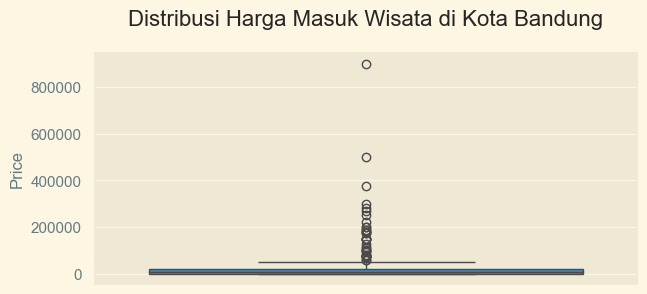

In [102]:
plt.figure(figsize=(7,3))
sns.boxplot(tourism_information['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

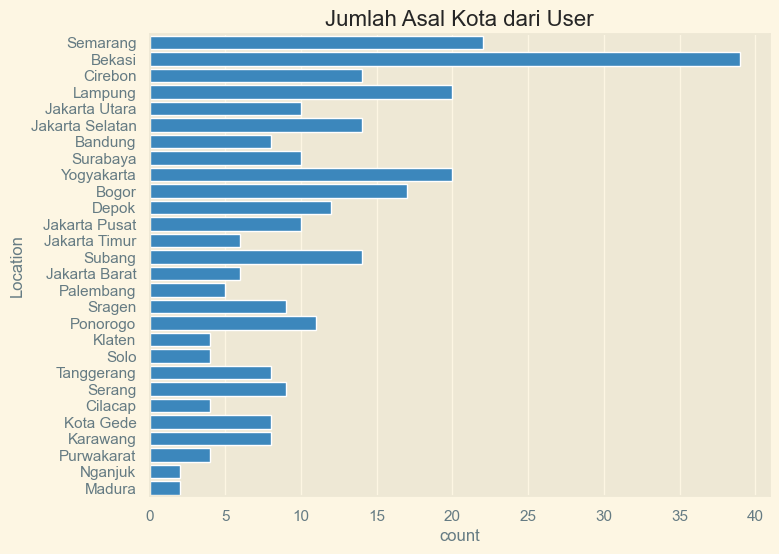

In [103]:


askot = tourism_user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()



Content Based Filtering

In [104]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category
128,219,Tebing Karaton,Cagar Alam,Tebing Keraton atau Tebing Karaton merupakan s...,Bandung,Bandung Cagar Alam
31,322,Bukit Jamur,Cagar Alam,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Bandung,Bandung Cagar Alam
8,154,Pantai Ngrawe (Mesra),Bahari,Kabupaten Gunungkidul jadi salah satu wilayah ...,Yogyakarta,Yogyakarta Bahari
271,252,Kampoeng Tulip,Taman Hiburan,Kampoeng Tulip ialah salah satu objek wisata d...,Bandung,Bandung Taman Hiburan
213,37,Bumi Perkemahan Cibubur,Taman Hiburan,Bumi Perkemahan dan Graha Wisata Pramuka Cibub...,Jakarta,Jakarta Taman Hiburan


TF-IDF Vectorizer

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Feature Name : ", list(cv.vocabulary_.keys()))

Feature Name :  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [106]:
cv_matrix = cv.transform(data['city_category']) 
 
cv_matrix.shape 

(437, 15)

In [107]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [108]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Observatorium Bosscha,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Taman Budaya Yogyakarta,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Taman Hutan Raya Ir. H. Juanda,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Heha Sky View,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
Kawasan Kuliner BSM,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
